In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import ortho_group

In [1]:
U = ortho_group.rvs(100)
S = np.diag(np.logspace(-2,2,100))
V = ortho_group.rvs(100)
A = U @ S @ V.T
np.linalg.cond(A)

/home/netrunner/miniconda3/envs/workspace/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


9999.999999999318

In [2]:
train = pd.read_csv(os.path.join("data", "train.csv"))
unique_m = pd.read_csv(os.path.join("data", "unique_m.csv"))

target = train.pop("critical_temp")
unique_m.drop("critical_temp", axis=1, inplace=True)

## The Data Is Absurdly Noisy

### Standard SVD Saying That Optimal Cutoff Rank Is Only A Few Below Original Rank! Nonsense!

/home/netrunner/miniconda3/envs/workspace/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


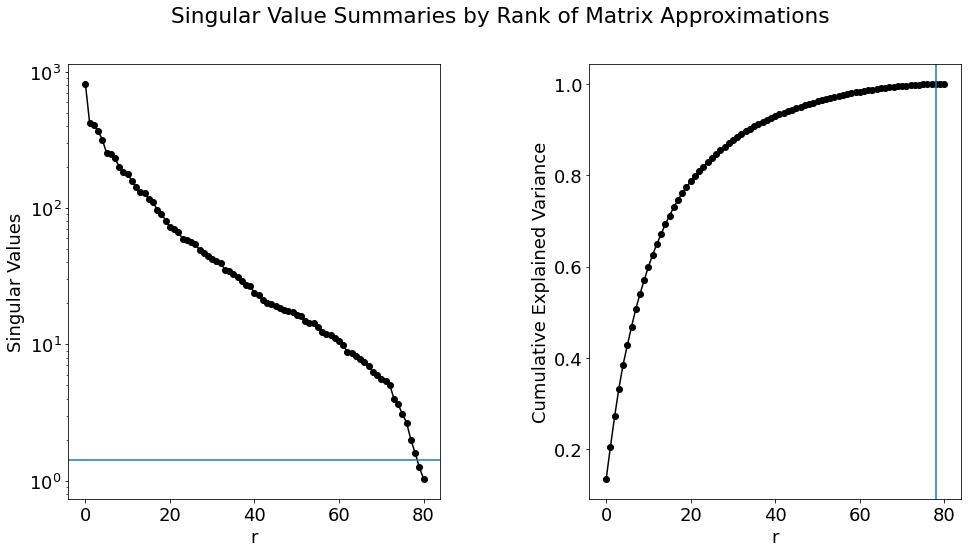

The Gavish-Donoho Hard Cutoff Corresponds To R='78'


In [3]:
from src.plots.plots import plot_singular_values_vs_rank

r = plot_singular_values_vs_rank(train, robust=False, max_iters=10000, svt_tol=10**(-5))
print("The Gavish-Donoho Hard Cutoff Corresponds To R='{0}'".format(r))

### Robust PCA Comes To The Rescue

  3%|▎         | 302/10000 [00:55<29:44,  5.44it/s]


SUCCESS: Convergence at Iteration '302'!


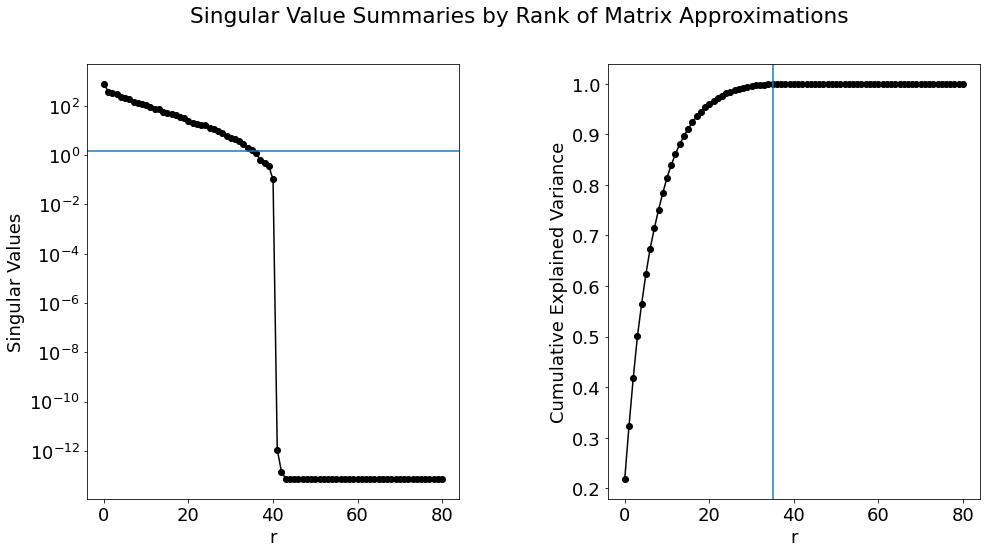

The Gavish-Donoho Hard Cutoff Corresponds To R='35'


In [8]:
r = plot_singular_values_vs_rank(train, robust=True, max_iters=10000, svt_tol=10**(-5))
print("The Gavish-Donoho Hard Cutoff Corresponds To R='{0}'".format(r))